In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [4]:
X = data[data.columns[:-1]]
Y = data['affair']

In [5]:
model = LogisticRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
predictions

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
recall = []
precision = []
TPR = []
FPR = []

predictions = model.predict_proba( X_test )
threshold = np.linspace(0.1, 0.9, 35)

for th in threshold:
    tp = 0 # True positive
    fp = 0 # False positive
    fn = 0 # False negative
    tn = 0 # True negative
    for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
        if predicted_prob >= th:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    pr = tp / (tp + fp)
    rec = tp / (tp + fn)
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    
    recall.append(rec) 
    precision.append(pr) 
    TPR.append(tpr) 
    FPR.append(fpr) 
    


In [38]:
d = {"recall":recall,
     "precision": precision,
     "TPR":TPR,
     "FPR":FPR}
df = pd.DataFrame(d, index=threshold)
df

,recall,precision,TPR,FPR
0.100000,0.981997,0.334262,0.981997,0.919938
0.123529,0.962357,0.348341,0.962357,0.846805
0.147059,0.941080,0.366242,0.941080,0.765974
0.170588,0.913257,0.382454,0.913257,0.693610
0.194118,0.877250,0.401799,0.877250,0.614319
0.217647,0.846154,0.417272,0.846154,0.555812
0.241176,0.816694,0.449955,0.816694,0.469592
0.264706,0.775777,0.467456,0.775777,0.415704
0.288235,0.733224,0.496124,0.733224,0.350269
0.311765,0.667758,0.512563,0.667758,0.298691


Text(0, 0.5, 'TPR')

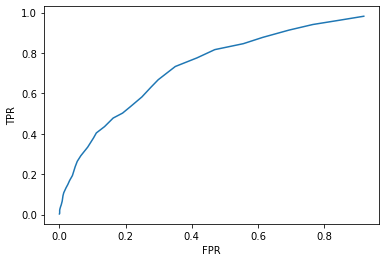

In [42]:
fig, ax = plt.subplots()
plt.plot(FPR,TPR)

ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

Text(0, 0.5, 'precision')

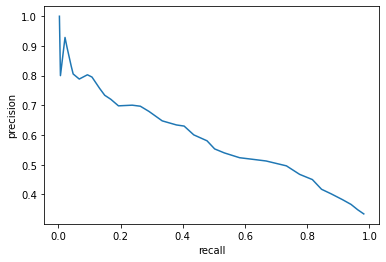

In [43]:
fig, ax = plt.subplots()
plt.plot(recall,precision)
ax.set_xlabel('recall')
ax.set_ylabel('precision')

Text(0, 0.5, 'TPR')

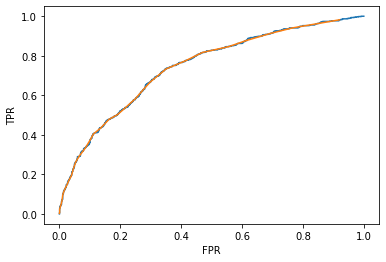

In [44]:
fpr1, tpr1, thres1= roc_curve(Y_test, predictions[:, 1])


fig, ax = plt.subplots()

plt.plot(fpr1, tpr1)
plt.plot(FPR,TPR)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')